## Market Basket Analysis on Grocery Store Data

Market Basket Analysis (MBA)is a popular data mining technique used to discover interesting relationships, patterns, or associations between items purchased together by customers. When applied to grocery store data, MBA provides valuable insights into consumer buying behavior, allowing businesses to optimize product placement, cross-selling strategies, inventory management, and marketing campaigns.

### Objective
The main goal of performing Market Basket Analysis on grocery store data is to identify frequent itemsets (groups of products often purchased together) and generate association rules. These rules help understand which products drive co-purchases, enabling the store to increase basket size and revenue.

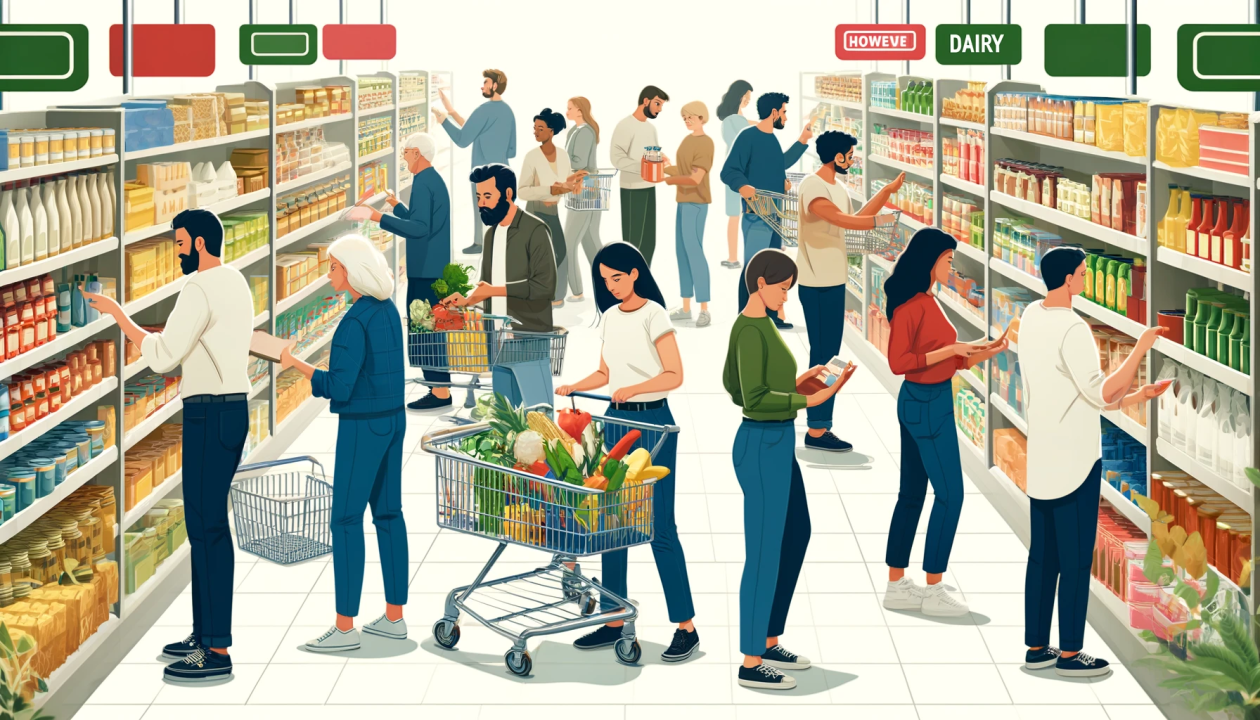

#### Import Necessary Libraries

In [59]:
# Importing numpy for numerical operations
import numpy as np

# Importing pandas for working with datasets (loading, manipulating, analyzing data)
import pandas as pd 

# Importing seaborn for advanced statistical data visualization
import seaborn as sns

# Importing matplotlib for creating basic plots and graphs
import matplotlib.pyplot as plt

# Importing warnings library to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")  # This will suppress warning messages to keep the output clean

## Exploratory Data Analysis

#### Load the Dataset

In [61]:
# Loading the grocery store dataset into a pandas DataFrame
df = pd.read_csv('Groceries_dataset.csv')

#### View the First 5 Records

In [3]:
# Displaying the first 5 rows of the dataset to understand its structure
df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


#### Check Data Information 

In [71]:
# Displaying concise summary of the dataset: number of non-null entries, column types, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


#### Check for Missing Values

In [77]:
# Checking for missing (null) values in each column and sorting them in descending order
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

#### Convert 'Date' Column to DateTime Format

In [81]:
# Converting the 'Date' column from object (string) type to datetime type for easier date operations
df['Date'] = pd.to_datetime(df['Date'])

# Checking the updated data types and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


####  Find the Top 10 Most Sold Items 

In [93]:
# Grouping the dataset by 'itemDescription' to count the frequency of each item
Item_distribution = df.groupby(by='itemDescription').size().reset_index(name='Frequency')

# Sorting the items based on their frequency in descending order and selecting the top 10
Item_distribution = Item_distribution.sort_values(by='Frequency', ascending=False).head(10)

# Displaying the result
Item_distribution



,itemDescription,Frequency
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


#### Visual representation of top 10  Sold Items

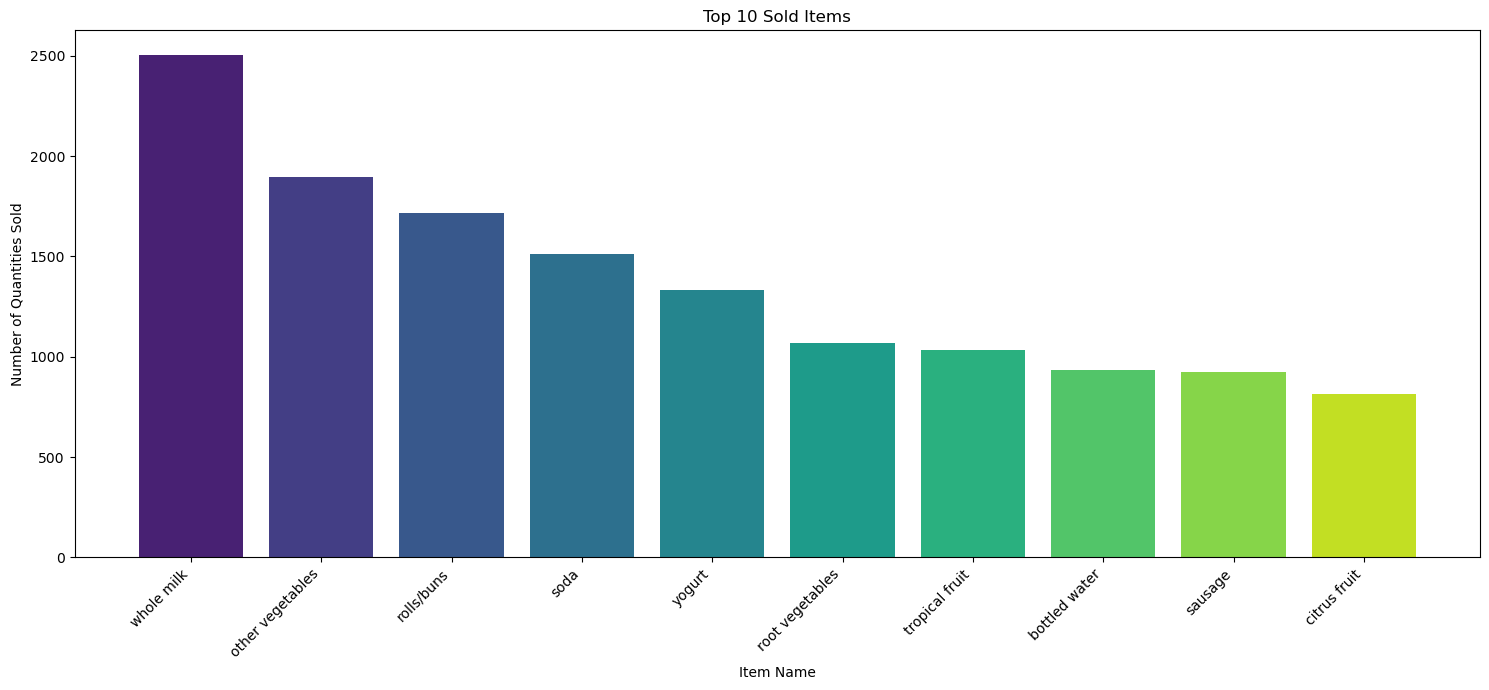

In [105]:
# Extract bars and heights from Item_distribution
bars = Item_distribution['itemDescription']
height = Item_distribution['Frequency']

# Generate positions for each bar
x_pos = np.arange(len(bars))

# Get the 'viridis' color palette from seaborn
colors = sns.color_palette("viridis", len(bars))

# Create the bar plot with the viridis color palette
plt.figure(figsize=(15, 7))
plt.bar(x_pos, height, color=colors)

# Add titles and labels
plt.title('Top 10 Sold Items')
plt.xlabel("Item Name")
plt.ylabel('Number of Quantities Sold')

# Customize the x-axis tick labels to match item descriptions
plt.xticks(x_pos, bars, rotation=45, ha="right")

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

####  Number of Items Sold per Month 

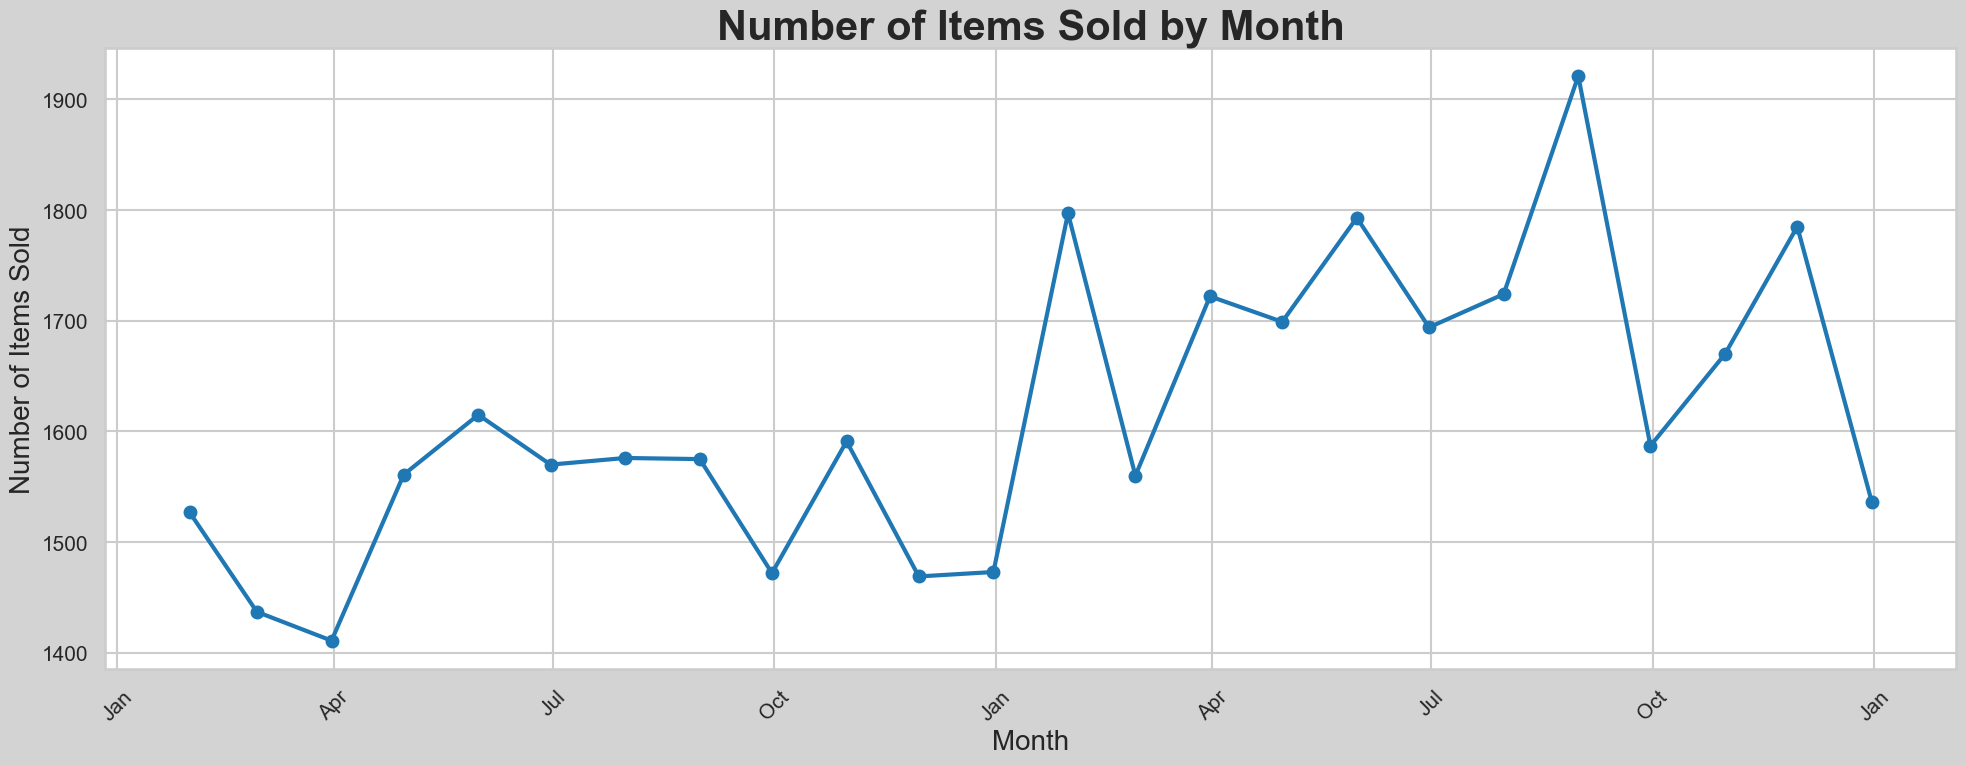

In [147]:
# Set 'Date' as the index of the DataFrame
df_date = df.set_index('Date')

# Resample the data by month and count the 'itemDescription' occurrences
monthly_sales = df_date.resample("M")['itemDescription'].count()

# Create the plot with a background color
plt.figure(figsize=(20, 8))

# Plot the data with markers for data points
plt.plot(monthly_sales.index, monthly_sales, color='tab:blue', linewidth=3, marker='o', markersize=8, markeredgewidth=2)

# Set the title and labels with larger font size
plt.title("Number of Items Sold by Month", fontsize=30, fontweight='bold')
plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Items Sold', fontsize=20)

# Customize x-ticks to show months in "MMM" format
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format x-ticks to 'Jan', 'Feb', etc.

# Rotate x-ticks for better readability and adjust font size
plt.xticks(rotation=45, fontsize=15)

# Adjust font size for y-ticks
plt.yticks(fontsize=15)

# Set background color for the plot and axes
plt.gcf().set_facecolor('lightgray')  # Set the background color for the entire figure
plt.gca().set_facecolor('white')      # Set the background color for the plot area (axes)

# Show the plot with tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
df_date.resample("M")['itemDescription'].count().plot(figsize=(20,8),grid = True,title = "Number of Items Sold by Month").set(xlabel = 'Month',ylabel = 'Number of Items Sold')

####  Ordered View of Customer-Level Data 

In [149]:
# Sort by 'Member_number' in descending order and strip whitespace in 'itemDescription'
Cust_Level = df[['Member_number', 'itemDescription']].sort_values(by='Member_number', ascending=False)

# Strip leading and trailing whitespace from 'itemDescription'
Cust_Level['itemDescription'] = Cust_Level['itemDescription'].str.strip()

# Reset index for sequential index
Cust_Level.reset_index(drop=True, inplace=True)

In [151]:
Cust_Level

,Member_number,itemDescription
0,5000,soda
1,5000,semi-finished bread
2,5000,fruit/vegetable juice
3,5000,bottled beer
4,5000,root vegetables
...,...,...
38760,1000,whole milk
38761,1000,pickled vegetables
38762,1000,sausage
38763,1000,semi-finished bread


#### Create a list of transactions for each customer
where each transaction is a list of itemDescription values associated with that particular Member_number.

In [27]:
transactions =[ a[1]['itemDescription'].tolist() for a in list(Cust_Level.groupby(['Member_number']))]

## Apriori Algorithm

Apriori is a popular algorithm used in association rule mining, a data mining technique used to identify patterns or relationships between variables in large datasets.
The Apriori algorithm works by generating frequent itemsets from the given dataset, where an itemset is a collection of one or more items. The algorithm then uses these frequent itemsets to derive association rules that indicate the likelihood of the occurrence of one item based on the presence or absence of another item.

### Associate Rule Mining
Have you ever thought about why all the sections and racks in a supermarket are structured in such a way that the products are associated? Bread,butter, honey or cheese and eggs for example, can be found in nearby racks, as can a toothbrush and toothpaste. These products are linked. If you buy a brush, you are more likely to buy the paste. These are marketing strategies designed to get you to load your basket with products and their linked things, hence increasing sales revenue. Several businesses offer discounts on the connected item or combine both items and sell them at a lower price in order to entice you to buy the item+item associated with it.

### Association Rule

Association rules are a type of statistical rule-based approach used in data mining and machine learning. The goal of association rule mining is to identify frequent patterns, associations, or correlations between different items in a dataset.

Support: It denotes the item’s popularity; if an item is not regularly purchased, it will not be considered in the association.

Confidence: It indicates the possibility that Y will be purchased when X is purchased.

Lift: It mixes support and assurance. A lift of more than one indicates that the antecedent’s presence raises the likelihood that the consequent will take place in a particular transaction. When the lift is less than 1, there is a lower likelihood of buying the antecedent and consequent in the same transaction.




#### Apply Apriori algorithm

In [278]:
from apyori import apriori

rules = apriori(
    transactions=transactions, 
    min_support=0.002, 
    min_confidence=0.05, 
    min_lift=3, 
    max_length=2
)

In [280]:
results = list(rules)

In [282]:
# Extract and display the rules in a more readable format

for rule in results:
    # Extract the antecedent (LHS), consequent (RHS), support, confidence, and lift
    print(f"Rule: {', '.join([str(item) for item in rule.items])}")
    print(f"Support: {rule.support}")
    print(f"Confidence: {rule.ordered_statistics[0].confidence}")
    print(f"Lift: {rule.ordered_statistics[0].lift}")
    print("-" * 50)

Rule: kitchen towels, UHT-milk
Support: 0.002308876346844536
Confidence: 0.30000000000000004
Lift: 3.821568627450981
--------------------------------------------------
Rule: potato products, beef
Support: 0.002565418163160595
Confidence: 0.4545454545454546
Lift: 3.8021849395239955
--------------------------------------------------
Rule: coffee, canned fruit
Support: 0.002308876346844536
Confidence: 0.4285714285714286
Lift: 3.7289540816326534
--------------------------------------------------
Rule: meat spreads, domestic eggs
Support: 0.0035915854284248334
Confidence: 0.4
Lift: 3.0042389210019267
--------------------------------------------------
Rule: flour, mayonnaise
Support: 0.002308876346844536
Confidence: 0.06338028169014086
Lift: 3.3385991625428253
--------------------------------------------------
Rule: rice, napkins
Support: 0.0030785017957927143
Confidence: 0.2448979591836735
Lift: 3.011395094315329
--------------------------------------------------
Rule: waffles, sparkling wi

In [284]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs,rhs,supports,confidences,lifts))
resultsindataframe = pd.DataFrame(inspect(results),columns = ['LHS','RHS','Support','Confidences','Lifts'])

In [286]:
resultsindataframe.nlargest(n=20,columns = "Lifts")

,LHS,RHS,Support,Confidences,Lifts
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
4,flour,mayonnaise,0.002309,0.063380,3.338599
6,sparkling wine,waffles,0.002565,0.217391,3.150154
5,rice,napkins,0.003079,0.244898,3.011395
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239


## Insights from the Results:

### 1. Strong Product Associations:
__Kitchen towels and UHT-milk:__

Lift = 3.82: This suggests a strong connection between these two products. People who buy kitchen towels are much more likely to also buy UHT-milk, possibly because they are shopping for household essentials. This could be a good opportunity for bundling these items together.

__Potato products and Beef:__

Lift = 3.80: There’s a strong likelihood that customers buying potato products also purchase beef. This indicates that these two items are often bought for meal preparation. Promoting them together could increase sales.

__Canned fruit and Coffee:__

Lift = 3.73: Customers who buy canned fruit are also likely to buy coffee, suggesting these are often bought together for breakfast or snack purposes. This could be a great opportunity for breakfast combo promotions.

__Flour and Mayonnaise:__

Lift = 3.34: This rule shows a moderate correlation between flour and mayonnaise. Customers who buy flour may also purchase mayonnaise. These items could appeal to home bakers or meal planners, which makes them a good pair for cooking promotions.

__Sparkling wine and Waffles:__

Lift = 3.15: There’s a decent connection between sparkling wine and waffles. This suggests customers might buy both items for special occasions or weekend brunches. Bundling these products together could cater to celebration promotions.

__Rice and Napkins:__

Lift = 3.01: Customers purchasing rice are likely to also buy napkins. This pairing suggests that family meals or group dining might be driving the association. Promoting them as part of a family meal deal could be beneficial.

__Meat spreads and Domestic eggs:__

Lift = 3.00: This combination is linked to breakfast or brunch purchases. If customers buy meat spreads, they’re likely to buy eggs as well. This could be a good match for a brunch promotion.

### 2. Implications for Marketing & Sales:
__Product Pairing & Bundling:__

The high lift values indicate that some products are very commonly bought together. For example, potato products and beef or canned fruit and coffee should be marketed together in meal kits or breakfast bundles.

Discounts on product pairs could encourage customers to purchase more of these commonly paired items.

__Targeted Promotions:__

Items like sparkling wine and waffles are ideal for holiday or weekend celebrations, while rice and napkins are more suitable for family meal deals. Tailoring promotions based on these pairings can help target specific customer needs.

__Cross-Selling:__

These insights suggest that products bought together frequently could be promoted in a cross-selling strategy, where customers are offered related products during checkout. For example, customers buying flour could be recommended mayonnaise.

### 3. Customer Segmentation:
By analyzing these combinations, retailers can create customer segments based on buying habits:

__Breakfast Shoppers__: Customers buying canned fruit, coffee, and eggs might be categorized as breakfast buyers.

__Family Meal Shoppers__: Customers buying rice and napkins could belong to the family meal group.

__Celebration Shoppers__: Customers buying sparkling wine and waffles could be targeted for special occasion sales.

### 4. Sales Strategy Recommendations:
__Cross-Promotions:__

Based on the product associations, cross-promotions could be used effectively. For example, placing kitchen towels near UHT-milk in stores could increase the likelihood of both products being purchased together.

__Customized Recommendations:__

A recommendation engine can be implemented, especially in online stores, to suggest products that are frequently bought together, like recommending coffee when someone buys canned fruit.

### 5. Opportunities for Growth:
__Bundles and Discounts:__

Offering bundle discounts for commonly purchased combinations like meat spreads and eggs or flour and mayonnaise could increase average transaction value.

__Seasonal Campaigns:__

Running seasonal promotions around products with strong associations (e.g., sparkling wine and waffles for New Year's or Christmas) can boost sales during holidays.



## Conclusion:
The rules provide valuable insights into customer buying behavior and suggest opportunities for product pairings, cross-selling, and targeted promotions. By using these insights, businesses can enhance sales strategies, product placement, and customer satisfaction